<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#15A.-Satellite-question" data-toc-modified-id="15A.-Satellite-question-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>15A. Satellite question</a></span></li><li><span><a href="#My-answer" data-toc-modified-id="My-answer-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>My answer</a></span></li></ul></div>

In [2]:
from IPython.display import Image

# Introduction

Practice using cartopy to plot the orbit for your cloudsat granule, with
your storm highlighted in blue.

In [7]:
from importlib import reload
import numpy as np
import datetime as dt
from datetime import timezone as tz
from matplotlib import pyplot as plt
import pyproj
from numpy import ma
import a301
from a301.cloudsat import get_geo
from pathlib import Path
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy
#
# new functions to read vdata and sds arrays
#
from a301.cloudsat import HDFvd_read, HDFsd_read
plt.style.use('ggplot')

# 15A. Satellite question

In the cell below read in lats and lons for your orbit (from any of your hdf files) and plot
the entire orbit as a series of red dots, with the storm segment
plotted in blue dots, the orbit start as a cyan dot, and the orbit end as a black dot, as
shown in the example image at the bottom of the page.
Use a cartopy ccrs.PlateCarree projection, and
consult the [cartopy_mapping_pyproj](https://clouds.eos.ubc.ca/~phil/courses/atsc301/coursebuild/html/cartopy_mapping_pyproj.html) notebook for how to use projection.transform_points to get the x,y coorinates for the
orbit.

**Hand in a converted html version of this notebook**

orbit start_coords: (141.31588745117188, -0.009404215961694717)
storm start: 2010-09-16 17:16:00+00:00


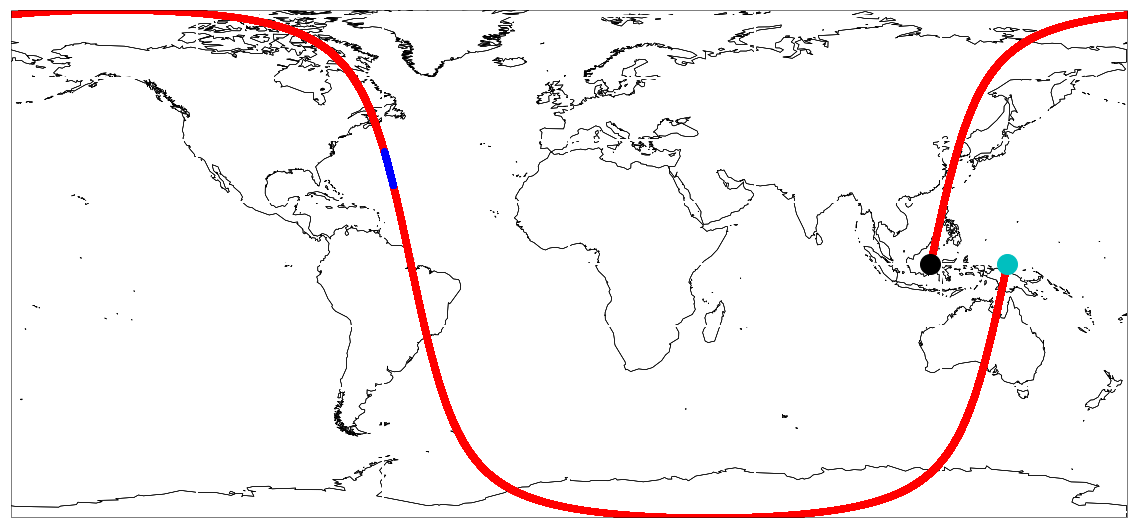

In [36]:
import pdb
#
# get lats and lons from the 2C-RAIN file
#
hr_file= list(a301.data_dir.glob('*2C-RAIN*hdf'))[1]
lats,lons,date_times,prof_times,dem_elevation=get_geo(hr_file)
lats=lats.squeeze()
lons=lons.squeeze()
# YOUR CODE HERE
globe_w = ccrs.Globe(datum="WGS84",ellipse="WGS84")
projection=ccrs.PlateCarree(central_longitude=0.0,globe=globe_w)
geodetic = ccrs.Geodetic()
prj_w=pyproj.Proj(projection.proj4_init)
x_w84, y_w84 = prj_w(lons, lats)
minx,maxx=np.min(x_w84),np.max(x_w84)
miny,maxy=np.min(y_w84),np.max(y_w84)
#left x, right x, left y, right y
extent=[minx, maxx, miny, maxy]



first_time=date_times[0]
print(f'orbit start_coords: {start_lon,start_lat}')
start_hour=17
start_minute=16
storm_start=starttime=dt.datetime(first_time.year,first_time.month,first_time.day,
                                        start_hour,start_minute,0,tzinfo=tz.utc)
storm_stop=storm_start + dt.timedelta(minutes=3)
print(f'storm start: {storm_start}')
time_hit = np.logical_and(date_times > storm_start,date_times < storm_stop)
storm_lats = lats[time_hit]
storm_lons=lons[time_hit]

fig, ax = plt.subplots(1, 1, figsize=(20,20),
                       subplot_kw={'projection': projection})
ax.set_extent(extent,projection)
ax.gridlines(linewidth=2)
ax.add_feature(cartopy.feature.GSHHSFeature(scale='coarse', levels=[1,2,3]));
out=projection.transform_points(geodetic,lons,lats)
xcoords = np.append(out[:,0],out[0,0])
ycoords = np.append(out[:,1],out[0,1])
ax.plot(xcoords, ycoords,'ro');

out_storm=projection.transform_points(geodetic,storm_lons,storm_lats)
xcoords_storm = np.append(out_storm[:,0],out_storm[0,0])
ycoords_storm = np.append(out_storm[:,1],out_storm[0,1])
ax.plot(xcoords_storm,ycoords_storm, 'bo')


start_lon=lons[0]
start_lat=lats[0]
orbit_start_point = projection.transform_point(start_lon,start_lat,geodetic)
ax.plot(orbit_start_point[0],orbit_start_point[1],'co',markersize=20);

end_lon=lons[-1]
end_lat=lats[-1]
orbit_end_point = projection.transform_point(end_lon,end_lat,geodetic)
ax.plot(orbit_end_point[0],orbit_end_point[1],'ko',markersize=20);


# My answer

Your plot should look something like this:

In [5]:
Image(url="https://clouds.eos.ubc.ca/~phil/courses/atsc301/downloads/orbit_15.png")